In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from copy import deepcopy as dc
!pip install pmdarima
from pmdarima.arima import auto_arima
import random as rand
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00


In [2]:
# Carga y procesamiento
sales = pd.read_csv("https://raw.githubusercontent.com/armando-lv/csv_storage/main/Ventas%202022%20Datos.csv", index_col = None, encoding='latin-1')
sales.columns = ["ID", "Propiedad", "Agente", "Venta", "Mes", "Ganancia", "Comision"]
sales = sales.dropna()
sales["ID"] = sales["ID"].map(lambda x: int(x))
sales["Mes"] = sales["Mes"].map(lambda x: int(x))
sales["Pct Ganancia"] = sales["Ganancia"] / sales["Venta"]
sales["Pct Comision"] = sales["Comision"] / sales["Venta"]
sales["Agente"] = sales["Agente"].map(lambda x: str(x).strip())
sales

,ID,Propiedad,Agente,Venta,Mes,Ganancia,Comision,Pct Ganancia,Pct Comision
0,0,Comercial,Max,795000,1,95400,47700,0.12,0.06
1,1,Industrial,Nadia,8875000,1,1242500,710000,0.14,0.08
2,2,Comercial,Marcela,391000,1,31280,11730,0.08,0.03
3,3,Comercial,Alexander,8260000,1,1239000,660800,0.15,0.08
4,4,Comercial,Luis,7679000,1,614320,307160,0.08,0.04
...,...,...,...,...,...,...,...,...,...
81,81,Residencial,Alexander,4750000,11,712500,380000,0.15,0.08
82,82,Comercial,Marcela,8204000,11,902440,656320,0.11,0.08
83,80,Residencial,Alexander,127000,12,6350,5080,0.05,0.04
84,81,Residencial,Alexander,4521000,12,542520,226050,0.12,0.05


In [3]:
# from google.colab import files
# sales.to_csv('Ventas 2022.csv') 
# files.download('Ventas 2022.csv')

        Venta
Mes          
1    34314000
2    56348000
3    27220000
4    53193000
5    24168000
6     2934000
7     8113000
8    10017000
9     7051000
10    2527000
11   41975000
12   12875000


<Axes: xlabel='Mes'>

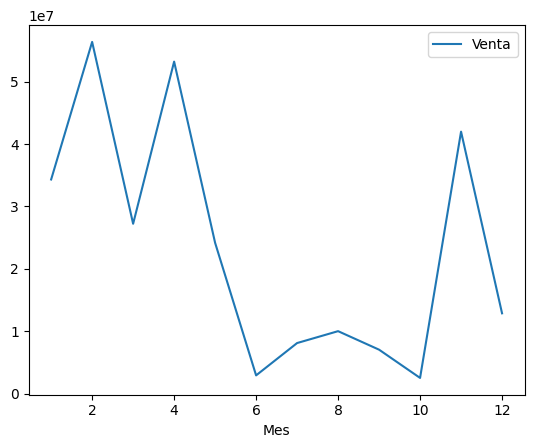

In [4]:
sales_sum = sales[["Venta", "Mes"]].groupby(["Mes"]).sum()
print(sales_sum)
sns.lineplot(sales_sum)

     Venta
Mes       
1        8
2       18
3       10
4       16
5        6
6        2
7        2
8        3
9        2
10       4
11      12
12       3


<Axes: xlabel='Mes'>

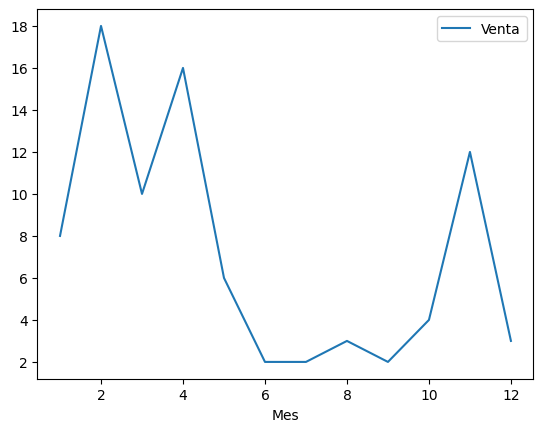

In [5]:
sales_count = sales[["Venta", "Mes"]].groupby(["Mes"]).count()
print(sales_count)
sns.lineplot(sales_count)

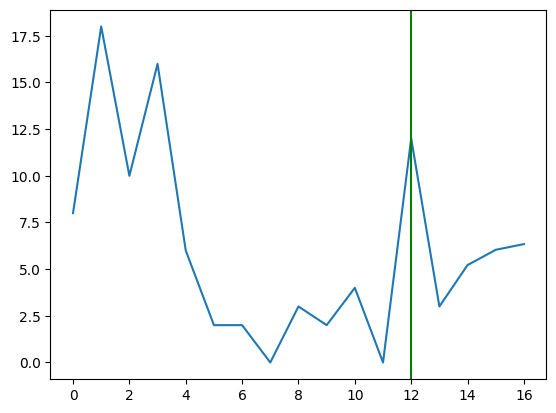

In [6]:
# Modelo arima para pronosticar cantidad de ventas en enero, febrero y marzo 2022
count_series = [x[0] for x in sales_count.values]
count_series = count_series[:7] + [0] + count_series[7:]

for i in range(1, 4):
  model = auto_arima(count_series, start_p=0, start_q=0)
  result = model.predict(steps = 1)
  count_series.append(result[0])

count_series = count_series[:11] + [0] + count_series[11:]
sns.lineplot(count_series)
plt.axvline(12, 0,20, color = "green")

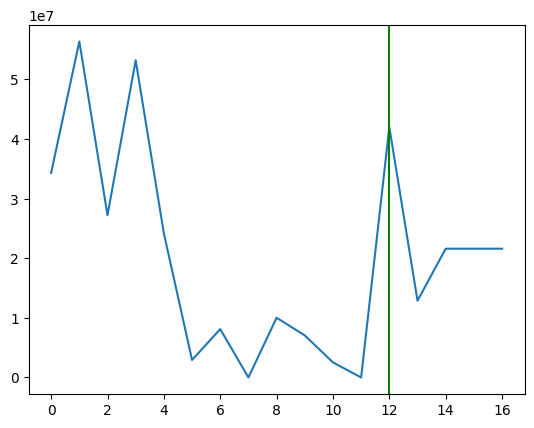

In [7]:
# Modelo arima para pronosticar cantidad de ventas en enero, febrero y marzo 2022
sales_series = [x[0] for x in sales_sum.values]
sales_series = sales_series[:7] + [0] + sales_series[7:]

for i in range(1, 4):
  model = auto_arima(sales_series, start_p=0, start_q=0)
  result = model.predict(steps = 1)
  sales_series.append(result[0])

sales_series = sales_series[:11] + [0] + sales_series[11:]
sns.lineplot(sales_series)
plt.axvline(12, 0,20, color = "green")

El modelo de simulación desarrollado ha proporcionado una perspectiva y una herramienta para solucionar el problema que se tiene en el negocio que se presenta al momento de asignar las diversas propiedades a los diferentes agentes y que de forma directa e indirecta ha afectado de manera importante los ingresos en determinados meses. Por lo cual, se puede concluir a grandes rasgos que las variables implementadas en la simulación han fungido como una pieza clave para distinguir las más relevantes y las que nos permitieron llegar a crear un modelo de simulación que logró determinar cuál es la mejor estrategia para generar las asignaciones de venta de un terreno a un agente para maximizar las ventas.

De igual manera, es importante mencionar que han existido algunas complicaciones alrededor del modelo que en un principio preocupo al grupo y totalmente distorsionando los objetivos a los que teníamos establecimos, pero finalmente logramos interpretar de forma efectiva la dinámica idónea y la alteración de las múltiples variables que afectan a la asignación concreta de los agentes considerando las variables más importantes.

Inserta tipo propiedad, inserta precio de venta recomendado, inserta vendedor, genera ganancia potencial, usa comision promedio para encontrar ganancia final <-- variable objetivo para encontrar el agente a usar

Encuentra factor entre 0.04 y 0.16 para encontrar ganancia
factor toma en cuenta porcentaje ganancia por agente por tipo de propiedad
Luego obten promedio de comision para ser la comisión del agente (agrega variabilidad)

In [8]:
# Simulación
profit = dc(sales[["Propiedad", "Agente", "Pct Ganancia"]])
cut = dc(sales[["Propiedad", "Agente", "Pct Comision"]])

avg_profit = dc(profit.groupby(["Propiedad", "Agente"]).mean()) # Ganancia promedio por agente por propiedad
avg_cut = dc(cut.groupby(["Propiedad", "Agente"]).mean()) # Comisión promedio por agente por propiedad
avg_avg = sales[["Agente", "Pct Ganancia", "Pct Comision"]].groupby(["Agente"]).mean()

In [9]:
# Inserta tipo de propiedad y precio de venta
# Opciones:
print(list(sales["Propiedad"].unique()))
propiedad = "Comercial"
venta = 250400

['Comercial', 'Industrial', 'Residencial']


In [33]:
agents = {"Agente" : list(sales["Agente"].unique())}
agents = pd.DataFrame(agents, columns = ["Agente"])

ganancia = []
comision = []
ganancia_final = []

current_profit = dc(avg_profit.loc[propiedad])
current_cut = dc(avg_cut.loc[propiedad])
for agent in agents["Agente"]:
  if agent in current_profit.index:
    ganancia.append(float(current_profit.loc[agent]))
    comision.append(float(current_cut.loc[agent]))
  else:
    ganancia.append(float(avg_avg["Pct Ganancia"].loc[agent]))
    comision.append(float(avg_avg["Pct Comision"].loc[agent]))

agents["Ganancia Sim"] = ganancia
agents["Comision Sim"] = comision

In [47]:
finales = []
for i in range(len(agents)):
  sim_profit = venta * agents.iloc[i, 1]
  sim_cut = (venta + sim_profit) * agents.iloc[i, 2]
  sim_final = sim_profit - sim_cut
  finales.append(sim_final)

agents["Ganancia Final"] = finales
agents["Porcentaje Ganancia Final"] = agents["Ganancia Final"] / venta

In [48]:
print(f"Precio de venta: {venta}, Tipo de propiedad: {propiedad}")
agents

Precio de venta: 250400, Tipo de propiedad: Comercial


,Agente,Ganancia Sim,Comision Sim,Ganancia Final,Porcentaje Ganancia Final
0,Max,0.130000,0.060000,15574.880000,0.062200
1,Nadia,0.115000,0.047500,15534.190000,0.062038
2,Marcela,0.113125,0.056875,12473.930312,0.049816
3,Alexander,0.117143,0.057143,13347.853061,0.053306
4,Luis,0.092000,0.064000,5536.844800,0.022112
